In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA 
%matplotlib inline

In [2]:
# Replace the path with the correct path for the data.
# specify use of columns due to low memory
y2015 = pd.read_csv(
    '../Datasets/LoanStats3d.csv',
    skipinitialspace=True,
    header=1,
    usecols=['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
           'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
           'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti',
             'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
             'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
            'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
            'collection_recovery_fee', 'last_pymnt_amnt', 'next_pymnt_d', 'collections_12_mths_ex_med',
            'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
            'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
             'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
             'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
             'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
             'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
              'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
              'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
              'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
             'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
    )

c:\users\madga\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139,16000,16000,16000.0,60 months,14.85%,379.39,C,10+ years,...,0,2,78.9,0.0,0,2,298100,31329,281300,13400
1,68354783,73244544,9600,9600,9600.0,36 months,7.49%,298.58,A,8 years,...,0,2,100.0,66.7,0,0,88635,55387,12500,75635
2,68466916,73356753,25000,25000,25000.0,36 months,7.49%,777.55,A,10+ years,...,0,0,100.0,20.0,0,0,373572,68056,38400,82117
3,68466961,73356799,28000,28000,28000.0,36 months,6.49%,858.05,A,10+ years,...,0,0,91.7,22.2,0,0,304003,74920,41500,42503
4,68495092,73384866,8650,8650,8650.0,36 months,19.89%,320.99,E,8 years,...,0,12,100.0,50.0,1,0,38998,18926,2750,18248


In [4]:
categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

term
2
int_rate
80
grade
7
emp_length
11
home_ownership
4
verification_status
3
issue_d
5
loan_status
7
pymnt_plan
1
purpose
13
initial_list_status
2
next_pymnt_d
3
application_type
2
verification_status_joint
3


In [5]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# # Drop other columns with many unique variables
# y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
#             'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [6]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
175372,57764085,61516862,3600,3600,3600.0,36 months,10.99,117.85,B,8 years,...,0,4,82.6,0.0,0,0,183191,117933,19000,141317
175373,56652784,60334520,12000,12000,11950.0,36 months,12.29,400.24,C,5 years,...,0,3,97.1,60.0,0,0,263116,68198,16700,68916
175374,57882742,61635468,8400,8400,8400.0,36 months,7.89,262.80,A,1 year,...,0,2,100.0,100.0,0,0,238181,45652,4300,41886
175375,57684484,61437259,5000,5000,5000.0,36 months,11.53,164.96,B,< 1 year,...,0,5,100.0,50.0,0,0,260493,150876,6500,137593
175376,57704450,61457217,18000,18000,18000.0,60 months,9.17,375.14,B,3 years,...,0,0,100.0,25.0,0,0,69906,58708,33300,33806


In [7]:
pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,initial_list_status_f,initial_list_status_w,next_pymnt_d_17-Feb,next_pymnt_d_17-Jan,next_pymnt_d_17-Mar,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401,72868139,16000,16000,16000.0,14.85,379.39,48000.00,33.18,0,...,0,1,0,1,0,1,0,0,0,0
1,68354783,73244544,9600,9600,9600.0,7.49,298.58,60000.00,22.44,0,...,0,1,0,1,0,1,0,0,0,0
2,68466916,73356753,25000,25000,25000.0,7.49,777.55,109000.00,26.02,0,...,0,1,0,0,0,1,0,0,0,0
3,68466961,73356799,28000,28000,28000.0,6.49,858.05,92000.00,21.60,0,...,0,1,0,1,0,1,0,0,0,0
4,68495092,73384866,8650,8650,8650.0,19.89,320.99,55000.00,25.49,0,...,0,1,0,0,0,1,0,0,0,0
5,68506798,73396623,23000,23000,23000.0,8.49,471.77,64000.00,18.28,0,...,0,1,0,1,0,1,0,0,0,0
6,68566886,73456723,29900,29900,29900.0,12.88,678.49,65000.00,21.77,0,...,0,1,1,0,0,1,0,0,0,0
7,68577849,73467703,18000,18000,18000.0,11.99,400.31,112000.00,8.68,0,...,0,1,0,0,0,1,0,0,0,0
8,66310712,71035433,35000,35000,35000.0,14.85,829.90,110000.00,17.06,0,...,0,1,0,1,0,1,0,0,0,0
9,68476807,73366655,10400,10400,10400.0,22.45,289.91,104433.00,25.37,1,...,0,1,0,0,0,1,0,0,0,0


In [8]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

#cross_val_score(rfc, X, Y, cv=10)

In [9]:
sns.set_style('white')

In [10]:
#heatmap is too hard to see, just do correlation matrix
X.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,initial_list_status_f,initial_list_status_w,next_pymnt_d_17-Feb,next_pymnt_d_17-Jan,next_pymnt_d_17-Mar,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
id,1.000000,0.979380,-0.027185,-0.027185,-0.027147,-0.028392,-0.025981,0.003204,0.005876,0.004024,...,-0.137468,0.137468,-0.007928,0.073476,-0.001869,-0.038726,0.038726,0.027974,0.015049,0.022174
member_id,0.979380,1.000000,-0.028191,-0.028191,-0.028155,-0.028343,-0.026917,0.002642,0.005918,0.003274,...,-0.136454,0.136454,-0.007107,0.072798,-0.001840,-0.038420,0.038420,0.027722,0.014971,0.022014
loan_amnt,-0.027185,-0.028191,1.000000,1.000000,0.999992,0.146248,0.942889,0.274597,0.006221,-0.015430,...,-0.039923,0.039923,0.011887,0.000463,0.002978,-0.025818,0.025818,0.012757,0.010841,0.021962
funded_amnt,-0.027185,-0.028191,1.000000,1.000000,0.999992,0.146248,0.942889,0.274597,0.006221,-0.015430,...,-0.039923,0.039923,0.011887,0.000463,0.002978,-0.025818,0.025818,0.012757,0.010841,0.021962
funded_amnt_inv,-0.027147,-0.028155,0.999992,0.999992,1.000000,0.145502,0.942869,0.274704,0.006159,-0.015474,...,-0.041087,0.041087,0.011949,0.000488,0.002978,-0.025763,0.025763,0.012736,0.010821,0.021904
int_rate,-0.028392,-0.028343,0.146248,0.146248,0.145502,1.000000,0.119886,-0.084466,0.054151,0.043034,...,0.147973,-0.147973,-0.083225,-0.002969,0.002806,-0.036314,0.036314,0.015475,0.019615,0.031463
installment,-0.025981,-0.026917,0.942889,0.942889,0.942869,0.119886,1.000000,0.269672,0.002402,-0.006529,...,0.003312,-0.003312,-0.004528,0.000771,0.003076,-0.023518,0.023518,0.009657,0.009821,0.022593
annual_inc,0.003204,0.002642,0.274597,0.274597,0.274704,-0.084466,0.269672,1.000000,-0.043694,0.035462,...,-0.025482,0.025482,-0.003669,-0.003957,-0.000884,0.012944,-0.012944,-0.005151,-0.008554,-0.010746
dti,0.005876,0.005918,0.006221,0.006221,0.006159,0.054151,0.002402,-0.043694,1.000000,-0.002094,...,0.006199,-0.006199,0.004293,0.001212,0.000250,-0.080649,0.080649,0.089589,0.012337,0.016893
delinq_2yrs,0.004024,0.003274,-0.015430,-0.015430,-0.015474,0.043034,-0.006529,0.035462,-0.002094,1.000000,...,0.008651,-0.008651,0.000102,0.010328,-0.002709,-0.000967,0.000967,0.002824,0.001644,-0.002979


In [11]:
#drop policy_code and pymnt_plan_n; nan
#combine member_id and id
#combine loan_amnt, funded_amnt, funded_amnt_inv, installment
#drop initial_list_status_f; f and w are complete inverse
X.drop(['policy_code', 'pymnt_plan_n', 'funded_amnt', 'funded_amnt_inv', 'id', 'installment'], axis=1, inplace=True)

In [12]:
X['loan_status'] = Y

In [13]:
X.loan_status.unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Default', 'Late (16-30 days)'], dtype=object)

In [14]:
#add success or fail of loan status
X['loan_status2'] = np.where(X.loan_status.isin(['Current', 'Fully Paid', 'In Grace Period']), 1, 0)

In [15]:
#check loan status
X[['loan_status2', 'loan_status']].head()

,loan_status2,loan_status
0,1,Current
1,1,Current
2,1,Fully Paid
3,1,Current
4,1,Fully Paid


In [16]:
#get columnn names of boolean values and combine then correlate them
for column in X:
    if (X[column].nunique() <= 2):
        print(X[column].name)

term_36 months
term_60 months
grade_A
grade_B
grade_C
grade_D
grade_E
grade_F
grade_G
emp_length_1 year
emp_length_10+ years
emp_length_2 years
emp_length_3 years
emp_length_4 years
emp_length_5 years
emp_length_6 years
emp_length_7 years
emp_length_8 years
emp_length_9 years
emp_length_< 1 year
home_ownership_ANY
home_ownership_MORTGAGE
home_ownership_OWN
home_ownership_RENT
verification_status_Not Verified
verification_status_Source Verified
verification_status_Verified
issue_d_15-Aug
issue_d_15-Dec
issue_d_15-Nov
issue_d_15-Oct
issue_d_15-Sep
purpose_car
purpose_credit_card
purpose_debt_consolidation
purpose_home_improvement
purpose_house
purpose_major_purchase
purpose_medical
purpose_moving
purpose_other
purpose_renewable_energy
purpose_small_business
purpose_vacation
purpose_wedding
initial_list_status_f
initial_list_status_w
next_pymnt_d_17-Feb
next_pymnt_d_17-Jan
next_pymnt_d_17-Mar
application_type_INDIVIDUAL
application_type_JOINT
verification_status_joint_Not Verified
verific

In [17]:
sample = X[['emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years','emp_length_3 years',
            'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
            'emp_length_8 years', 'emp_length_9 years']] 
sample['emp_length_1+ year'] = sample.sum(axis=1)
X['emp_length_1+ year'] = sample['emp_length_1+ year']


sample = X[['term_36 months', 'term_60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'emp_length_1+ year', 'emp_length_< 1 year',
'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Not Verified',
'verification_status_Source Verified', 'verification_status_Verified','issue_d_15-Aug', 'issue_d_15-Dec','issue_d_15-Nov', 'issue_d_15-Oct',
'issue_d_15-Sep', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_house',
'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
'purpose_vacation', 'purpose_wedding', 'initial_list_status_w', 'next_pymnt_d_17-Feb', 'next_pymnt_d_17-Jan', 'next_pymnt_d_17-Mar',
'application_type_INDIVIDUAL', 'application_type_JOINT', 'verification_status_joint_Not Verified', 'verification_status_joint_Source Verified',
'verification_status_joint_Verified', 'loan_status', 'loan_status2']]
sample.corr()

c:\users\madga\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,term_36 months,term_60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1+ year,...,initial_list_status_w,next_pymnt_d_17-Feb,next_pymnt_d_17-Jan,next_pymnt_d_17-Mar,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,loan_status2
term_36 months,1.000000,-1.000000,0.272237,0.175079,-0.071044,-0.156455,-0.261486,-0.163550,-0.073840,-0.055264,...,-0.075495,-0.018325,0.002690,-0.001810,0.023792,-0.023792,-0.015379,-0.011165,-0.014813,0.057954
term_60 months,-1.000000,1.000000,-0.272237,-0.175079,0.071044,0.156455,0.261486,0.163550,0.073840,0.055264,...,0.075495,0.018325,-0.002690,0.001810,-0.023792,0.023792,0.015379,0.011165,0.014813,-0.057954
grade_A,0.272237,-0.272237,1.000000,-0.299699,-0.292079,-0.184011,-0.131400,-0.066180,-0.030404,0.010910,...,0.114012,0.044323,-0.004157,-0.003288,0.019792,-0.019792,-0.012460,-0.008563,-0.013197,0.103601
grade_B,0.175079,-0.175079,-0.299699,1.000000,-0.415421,-0.261718,-0.186889,-0.094127,-0.043243,0.002017,...,0.007204,0.026780,0.009377,-0.001199,0.011721,-0.011721,-0.001421,-0.008838,-0.013291,0.083699
grade_C,-0.071044,0.071044,-0.292079,-0.415421,1.000000,-0.255064,-0.182137,-0.091733,-0.042143,-0.004501,...,0.029280,-0.002619,0.001665,0.004229,0.000996,-0.000996,0.000453,-0.001066,-0.001684,-0.014297
grade_D,-0.156455,0.156455,-0.184011,-0.261718,-0.255064,1.000000,-0.114748,-0.057793,-0.026551,-0.012348,...,-0.095199,-0.028915,-0.004850,-0.000567,-0.016006,0.016006,0.009798,0.009345,0.009571,-0.077170
grade_E,-0.261486,0.261486,-0.131400,-0.186889,-0.182137,-0.114748,1.000000,-0.041269,-0.018959,0.002515,...,-0.045827,-0.042395,-0.003031,0.000958,-0.020912,0.020912,0.004063,0.011997,0.024004,-0.106473
grade_F,-0.163550,0.163550,-0.066180,-0.094127,-0.091733,-0.057793,-0.041269,1.000000,-0.009549,0.002750,...,-0.083118,-0.033942,-0.006010,-0.001033,-0.010183,0.010183,0.002251,0.005971,0.011256,-0.088888
grade_G,-0.073840,0.073840,-0.030404,-0.043243,-0.042143,-0.026551,-0.018959,-0.009549,1.000000,0.002871,...,-0.046164,-0.028527,-0.002192,-0.000474,-0.012462,0.012462,0.005954,0.008039,0.009169,-0.056759
emp_length_1+ year,-0.055264,0.055264,0.010910,0.002017,-0.004501,-0.012348,0.002515,0.002750,0.002871,1.000000,...,0.011360,-0.004689,0.002816,0.000680,0.009980,-0.009980,-0.006914,-0.006251,-0.004665,0.021632


In [18]:
#application_type_INDIVIDUAL and application_type_JOINT are inverse
#term_36 months and term_60 months are inverse
#next_pymnt_d and issue_d_15- are unnecessary
#drop home_ownership
#combine loan types
#combine grade A-C as safe grade and grade D-G as risky grade
#remove combined employment years

X.drop(['application_type_JOINT','application_type_INDIVIDUAL', 'term_36 months', 'term_60 months'], axis=1, inplace=True)
X.drop(['next_pymnt_d_17-Feb', 'next_pymnt_d_17-Jan', 'next_pymnt_d_17-Mar', 'issue_d_15-Aug', 'issue_d_15-Sep', 'issue_d_15-Oct', 'issue_d_15-Nov', 'issue_d_15-Dec'], axis=1, inplace=True)
X.drop(['home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT'], 1, inplace=True)

X['purpose_consolidate'] = X[['purpose_credit_card', 'purpose_debt_consolidation']].sum(axis=1)
X['purpose_entertainment'] = X[['purpose_car', 'purpose_major_purchase', 'purpose_wedding', 'purpose_vacation']].sum(axis=1)
X.drop(['purpose_credit_card', 'purpose_car', 'purpose_debt_consolidation', 'purpose_major_purchase', 'purpose_wedding', 'purpose_vacation'], 1, inplace=True)

X['safe_grade'] = X[['grade_A', 'grade_B', 'grade_C']].sum(axis=1)
X['risky_grade'] = X[['grade_D', 'grade_E', 'grade_F', 'grade_G']].sum(axis=1)
X.drop(['grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G'], axis=1, inplace=True)

X.drop(['emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years','emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years'], 1, inplace=True) 

In [19]:
X = X.drop(['loan_status', 'loan_status2'], axis=1)
#cross_val_score(rfc, X, Y, cv=10)

In [20]:
sklearn_pca = PCA()
sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.95365442e-01 3.84875677e-03 3.82058832e-04 2.00784358e-04
 1.12732954e-04 4.26178963e-05 1.55381645e-05 9.50742276e-06
 8.64740214e-06 5.53783004e-06 4.09267252e-06 3.14233729e-06
 4.27892706e-07 3.38145918e-07 2.58128756e-07 6.15856797e-08
 4.86359869e-08 5.77875098e-09 5.32737377e-10 7.79770252e-11
 2.51151698e-11 2.02674161e-11 1.09005038e-11 8.31896785e-12
 6.22277846e-12 4.78103731e-12 2.99233179e-12 2.74474532e-12
 1.67858133e-12 1.13510810e-12 5.21663137e-13 5.07941113e-13
 3.66935187e-13 3.35033075e-13 1.49868252e-13 1.26507178e-13
 7.73597567e-14 7.20914261e-14 5.73413935e-14 4.81415424e-14
 4.12573821e-14 3.83731380e-14 3.48403175e-14 2.35991770e-14
 2.28977677e-14 1.67513499e-14 1.48912703e-14 1.12796755e-14
 1.09188213e-14 1.02567462e-14 8.59540502e-15 7.46451561e-15
 3.49788510e-15 2.60749382e-15 2.41897935e-15 1.66457856e-15
 1.45783370e-15 1.17118542e-15 9.11222720e-16 8.710

In [21]:
X.head()

,member_id,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,initial_list_status_f,initial_list_status_w,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,emp_length_1+ year,purpose_consolidate,purpose_entertainment,safe_grade,risky_grade
0,72868139,16000,14.85,48000.0,33.18,0,0,11,2,19108,...,0,1,0,0,0,1,1,0,1,0
1,73244544,9600,7.49,60000.0,22.44,0,0,7,0,7722,...,0,1,0,0,0,1,1,0,1,0
2,73356753,25000,7.49,109000.0,26.02,0,1,9,0,20862,...,0,1,0,0,0,1,1,0,1,0
3,73356799,28000,6.49,92000.0,21.60,0,0,16,0,51507,...,0,1,0,0,0,1,1,0,1,0
4,73384866,8650,19.89,55000.0,25.49,0,4,18,1,9568,...,0,1,0,0,0,1,1,0,0,1


In [22]:
#remove because effect on variance is low
X.drop(['member_id', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths'],       
       axis=1,
       inplace=True)

In [23]:
sklearn_pca = PCA()
sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.03093103e-01 4.89848374e-02 2.72230743e-02 1.01903223e-02
 3.66157335e-03 2.08374029e-03 1.55172747e-03 1.31075964e-03
 9.74878167e-04 7.45535227e-04 8.07974910e-05 6.94636350e-05
 1.68293709e-05 1.16239235e-05 1.58640743e-06 1.27428700e-07
 6.01062731e-09 4.84809982e-09 2.62941454e-09 1.99245891e-09
 1.48681579e-09 1.14460172e-09 7.15539077e-10 6.56206329e-10
 4.03820844e-10 2.71606213e-10 1.22067114e-10 1.05023000e-10
 8.73875500e-11 3.58082896e-11 3.02268073e-11 1.82487986e-11
 1.71990459e-11 1.36414396e-11 9.51738766e-12 8.60581599e-12
 5.80106726e-12 5.51577499e-12 4.15916319e-12 3.66633857e-12
 3.52553814e-12 3.22689245e-12 2.70271438e-12 2.61210382e-12
 2.43842219e-12 8.41534151e-13 6.23861749e-13 5.78226724e-13
 3.98022836e-13 3.49295936e-13 2.79839003e-13 2.18738366e-13
 2.08192431e-13 1.50392578e-13 1.42642964e-13 9.37361570e-14
 5.50741452e-14 2.49498763e-14 1.47005286e-14 1.147

In [24]:
X.head()

,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,initial_list_status_f,initial_list_status_w,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,emp_length_1+ year,purpose_consolidate,purpose_entertainment,safe_grade,risky_grade
0,11,2,19108,19,13668.88,13668.88,4519.68,4519.68,2331.12,2188.56,...,0,1,0,0,0,1,1,0,1,0
1,7,0,7722,9,6635.69,6635.69,3572.97,3572.97,2964.31,608.66,...,0,1,0,0,0,1,1,0,1,0
2,9,0,20862,19,0.00,0.00,26224.23,26224.23,25000.00,1224.23,...,0,1,0,0,0,1,1,0,1,0
3,16,0,51507,24,19263.77,19263.77,10271.36,10271.36,8736.23,1535.13,...,0,1,0,0,0,1,1,0,1,0
4,18,1,9568,19,0.00,0.00,9190.49,9190.49,8650.00,540.49,...,0,1,0,0,0,1,1,0,0,1


In [25]:
X.drop(['open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int'], 1, inplace=True)

In [26]:
sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)
X.head()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.12473459e-01 4.93966040e-02 2.35728277e-02 8.80672765e-03
 2.87254545e-03 1.34591037e-03 9.91729089e-04 4.45127529e-04
 8.18913964e-05 1.17819264e-05 1.25389609e-06 1.30250425e-07
 4.99346052e-09 2.64526774e-09 1.16053030e-09 7.83940399e-10
 6.96424405e-10 5.51693456e-10 3.30904286e-10 1.73697722e-10
 1.20654428e-10 9.75533688e-11 4.13647819e-11 3.59132030e-11
 2.76635386e-11 1.76805688e-11 1.75417944e-11 9.20467335e-12
 6.76478963e-12 5.61961677e-12 5.05493360e-12 4.05962561e-12
 3.81271379e-12 3.56248905e-12 3.54939395e-12 2.77563990e-12
 2.71996735e-12 2.07418728e-12 8.59102488e-13 5.86145169e-13
 4.03306952e-13 3.56502665e-13 2.22210081e-13 2.11108499e-13
 1.62040833e-13 1.44710551e-13 9.51273269e-14 5.58217978e-14
 2.52887690e-14 1.49027778e-14 1.16337051e-14 1.00016363e-14
 5.46036540e-15 8.81445434e-33 8.81445434e-33 8.81445434e-33
 8.81445434e-33]


,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,...,initial_list_status_f,initial_list_status_w,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified,emp_length_1+ year,purpose_consolidate,purpose_entertainment,safe_grade,risky_grade
0,0.0,0.0,0.0,379.39,0,0,0,31329,284700,6,...,0,1,0,0,0,1,1,0,1,0
1,0.0,0.0,0.0,298.58,0,0,0,55387,13000,2,...,0,1,0,0,0,1,1,0,1,0
2,0.0,0.0,0.0,20807.39,0,0,0,305781,38400,2,...,0,1,0,0,0,1,1,0,1,0
3,0.0,0.0,0.0,858.05,0,0,0,221110,79900,1,...,0,1,0,0,0,1,1,0,1,0
4,0.0,0.0,0.0,8251.42,0,0,0,18926,20750,17,...,0,1,0,0,0,1,1,0,0,1


In [27]:
X.drop(['total_rec_late_fee'], 1, inplace=True)

In [28]:
cross_val_score(rfc, X, Y, cv=10)

array([0.90718358, 0.90769143, 0.909744  , 0.91185358, 0.91298894,
       0.91184856, 0.91018988, 0.91263686, 0.91052692, 0.91114913])

--- 0.48774027824401855 seconds ---


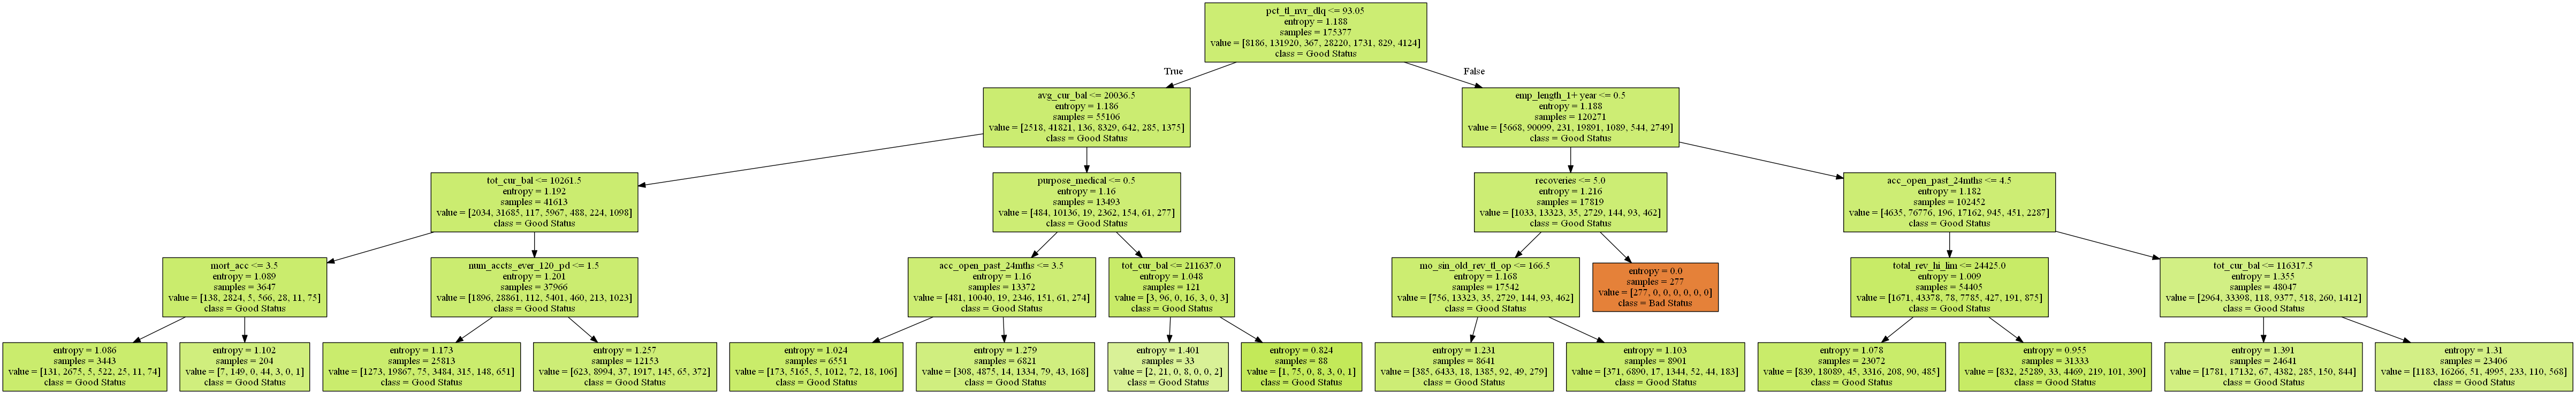

In [37]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Package to take time
import time

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)

start_time = time.time()
decision_tree.fit(X, Y)
print("--- %s seconds ---" % (time.time() - start_time))

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Bad Status', 'Good Status'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

--- 10.01219654083252 seconds ---


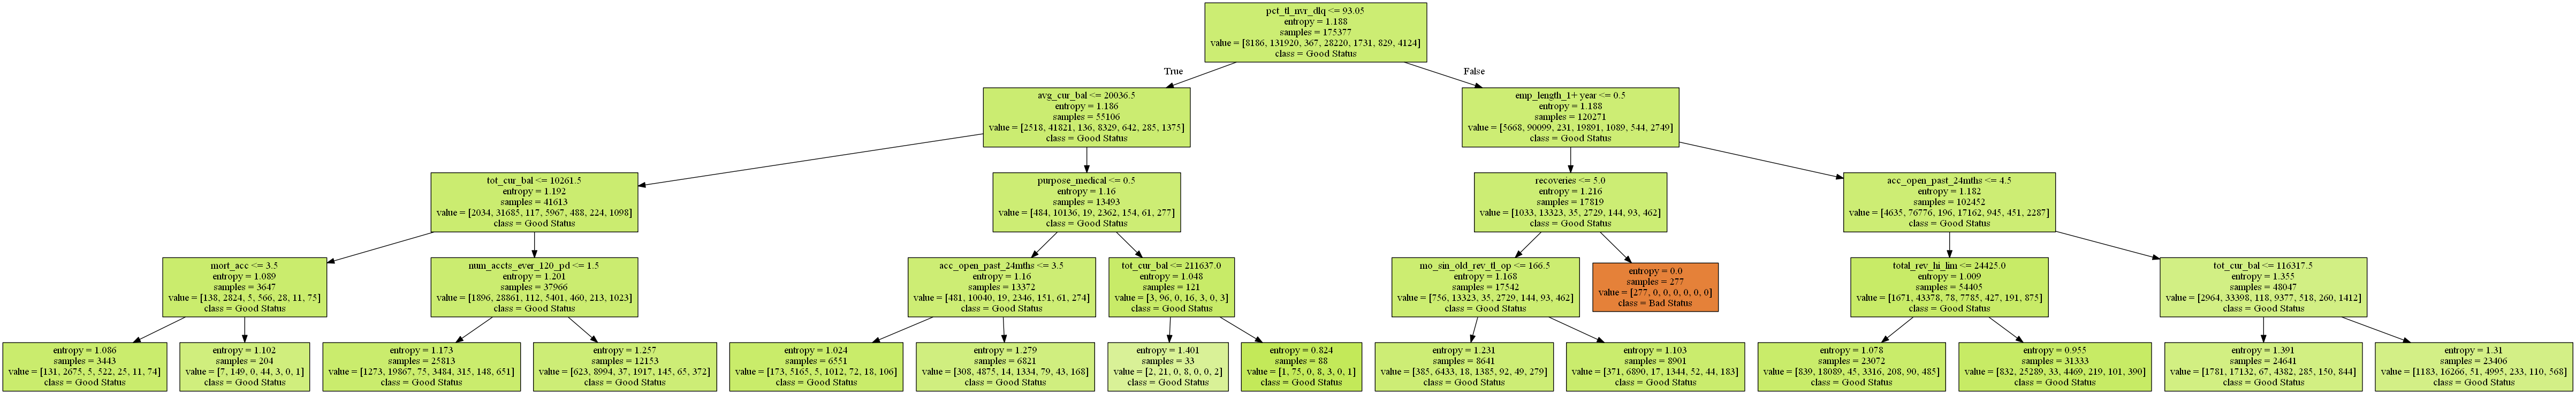

In [38]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()

start_time = time.time()
rfc.fit(X, Y)
print("--- %s seconds ---" % (time.time() - start_time))

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=X.columns,
    class_names=['Bad Status', 'Good Status'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())